## Cat-Dog Classifier with Transfer Learning

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

In [2]:
# Resize all the images to 224X224.VGG-16 requires input to be of this size 
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

# Add preprocessing layer to the front of VGG. +3 to add the channel
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze the weights: Don't train existing weights. for loop ensures that for every layer in vgg the weights are not retrained
for layer in vgg.layers:
  layer.trainable = False

In [3]:
from keras.preprocessing.image import ImageDataGenerator
# Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [4]:
# Get the number of classes
folders = glob('Datasets/Train/*')
print(folders)

['Datasets/Train\\cats', 'Datasets/Train\\dogs']


In [5]:
# Flatten the layers
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
x = Dense(1000, activation='relu')(x)
x = Dense(500, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
# Create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [6]:
# Compile the model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Epoch 1/2
251/251 [==============================] - 689s 3s/step - loss: 0.1314 - accuracy: 0.9450 - val_loss: 0.2719 - val_accuracy: 0.9036
Epoch 2/2
251/251 [==============================] - 697s 3s/step - loss: 0.1185 - accuracy: 0.9500 - val_loss: 0.2029 - val_accuracy: 0.9323


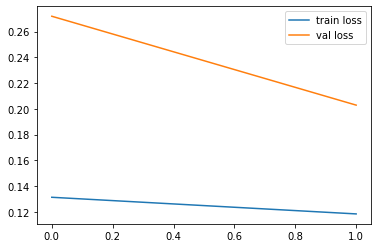

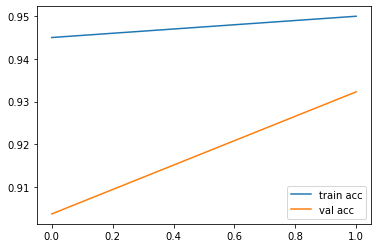

<Figure size 432x288 with 0 Axes>

In [9]:
# Fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# Plot loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Loss')

# Plot accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Accuracy')


model.save('cat_dog.h5')

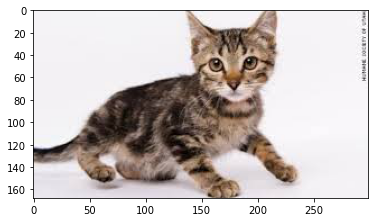

[[9.9999988e-01 8.8100364e-08]]


In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def load_image(filename):
    #load the image
    img = load_img(filename, grayscale=False, target_size=(224, 224))
    #convert to array
    img = img_to_array(img)
    #reshape 
    img = img.reshape(1, 224, 224, 3)
    #prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

img1 = mpimg.imread('image.jpg')
imgplot = plt.imshow(img1)
plt.show()
img = load_image("image.jpg")
model = load_model('cat_dog.h5')

# predict the class
y_pred = model.predict(img)
print(y_pred)

In [49]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

[0]


In [50]:
# predict the label
if y_pred[0] == 1:
    print("dog")
elif y_pred[0] == 0:
    print("cat")
else:
    print("Not in the list")

cat


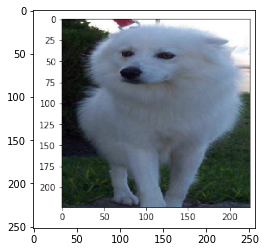

dog


In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def load_image(filename):
    #load the image
    img = load_img(filename, grayscale=False, target_size=(224, 224))
    #convert to array
    img = img_to_array(img)
    #reshape 
    img = img.reshape(1, 224, 224, 3)
    #prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

img1 = mpimg.imread('dog.png')
imgplot = plt.imshow(img1)
plt.show()
img = load_image("dog.png")
model = load_model('cat_dog.h5')

# predict the class
y_pred = model.predict(img)
y_pred = np.argmax(y_pred, axis=1)

# predict the label
if y_pred[0] == 1:
    print("dog")
elif y_pred[0] == 0:
    print("cat")
else:
    print("Not in the list")

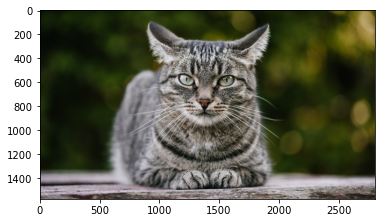

cat


In [62]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def load_image(filename):
    #load the image
    img = load_img(filename, grayscale=False, target_size=(224, 224))
    #convert to array
    img = img_to_array(img)
    #reshape 
    img = img.reshape(1, 224, 224, 3)
    #prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

img1 = mpimg.imread('cat.jpg')
imgplot = plt.imshow(img1)
plt.show()
img = load_image("cat.jpg")
model = load_model('cat_dog.h5')

# predict the class
y_pred = model.predict(img)
y_pred = np.argmax(y_pred, axis=1)

# predict the label
if y_pred[0] == 1:
    print("dog")
elif y_pred[0] == 0:
    print("cat")
else:
    print("Not in the list")

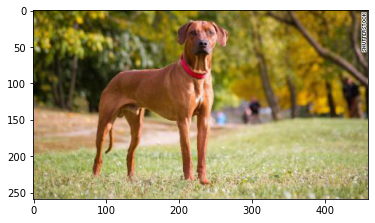

dog


In [63]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def load_image(filename):
    #load the image
    img = load_img(filename, grayscale=False, target_size=(224, 224))
    #convert to array
    img = img_to_array(img)
    #reshape 
    img = img.reshape(1, 224, 224, 3)
    #prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

img1 = mpimg.imread('sample.jpg')
imgplot = plt.imshow(img1)
plt.show()
img = load_image("sample.jpg")
model = load_model('cat_dog.h5')

# predict the class
y_pred = model.predict(img)
y_pred = np.argmax(y_pred, axis=1)

# predict the label
if y_pred[0] == 1:
    print("dog")
elif y_pred[0] == 0:
    print("cat")
else:
    print("Not in the list")

### Integrated Feature Extractor: The pre-trained model, or some portion of the model, is integrated into a new model, but layers of the pre-trained model are frozen during training.